In [15]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
mlb_data = pd.read_csv('mlb2018_2023.csv')

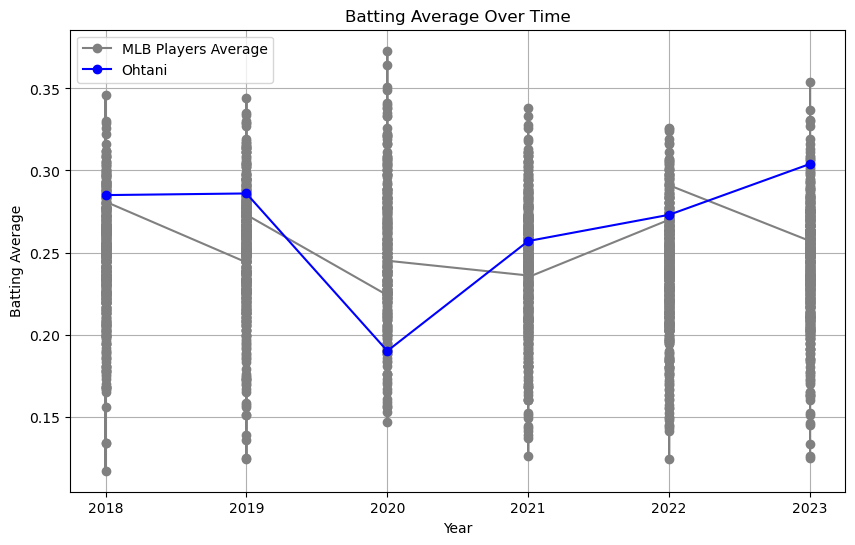

In [26]:
plt.figure(figsize=(10, 6))
plt.plot(mlb_data['year'], mlb_data['batting_avg'], marker='o', label='MLB Players Average', color='gray')
plt.plot(ohtani_data['year'], ohtani_data['batting_avg'], marker='o', label='Ohtani', color='blue')
plt.title('Batting Average Over Time')
plt.xlabel('Year')
plt.ylabel('Batting Average')
plt.legend()
plt.grid(True)
plt.savefig('Ohtani1.png', dpi = 400, bbox_inches = 'tight')
plt.show()

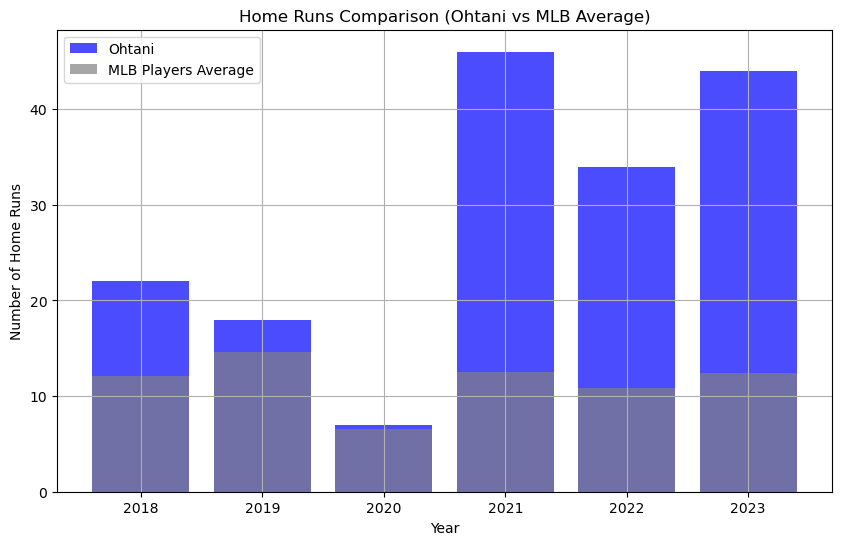

In [22]:
# 오타니
ohtani_hr = ohtani_data['home_run']
# MLB 선수
mlb_avg_hr = mlb_data.groupby('year')['home_run'].mean()

plt.figure(figsize=(10, 6))
plt.bar(ohtani_data['year'], ohtani_hr, label='Ohtani', color='blue', alpha=0.7)
plt.bar(mlb_avg_hr.index, mlb_avg_hr, label='MLB Players Average', color='gray', alpha=0.7)
plt.title('Home Runs Comparison (Ohtani vs MLB Average)')
plt.xlabel('Year')
plt.ylabel('Number of Home Runs')
plt.legend()
plt.grid(True)
plt.savefig('Ohtani3.png', dpi = 400, bbox_inches = 'tight')
plt.show()

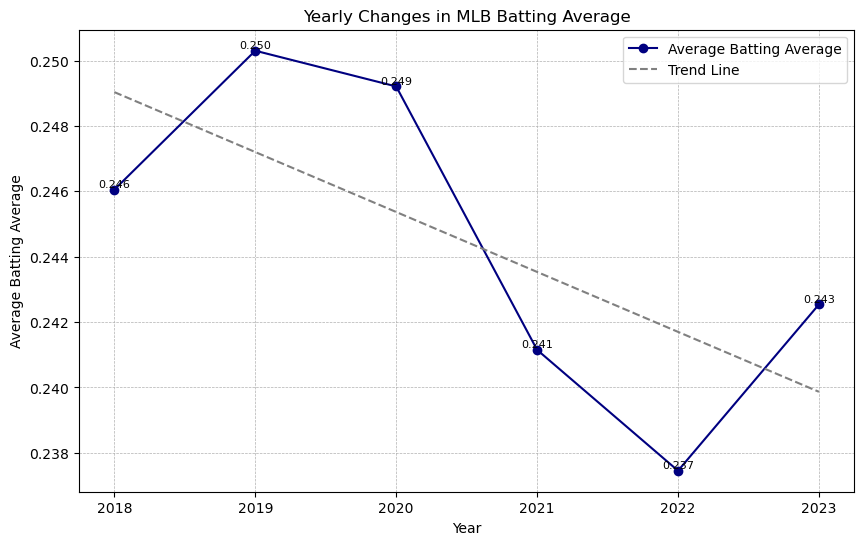

In [23]:
batting_avg_yearly = mlb_data.groupby('year')['batting_avg'].agg(['mean', 'std'])
fig, ax = plt.subplots(figsize=(10, 6))

#마커
ax.plot(batting_avg_yearly.index, batting_avg_yearly['mean'], marker='o', linestyle='-', color='navy', label='Average Batting Average')

#트렌드라인
z = np.polyfit(batting_avg_yearly.index, batting_avg_yearly['mean'], 1)
p = np.poly1d(z)
ax.plot(batting_avg_yearly.index, p(batting_avg_yearly.index), linestyle='--', color='gray', label='Trend Line')

for year, data in batting_avg_yearly.iterrows():
    ax.text(year, data['mean'], f"{data['mean']:.3f}", fontsize=8, verticalalignment='bottom', horizontalalignment='center')
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.set_title('Yearly Changes in MLB Batting Average')
ax.set_xlabel('Year')
ax.set_ylabel('Average Batting Average')
ax.legend()
plt.savefig('Ohtani4.png', dpi = 400, bbox_inches = 'tight')
plt.show()


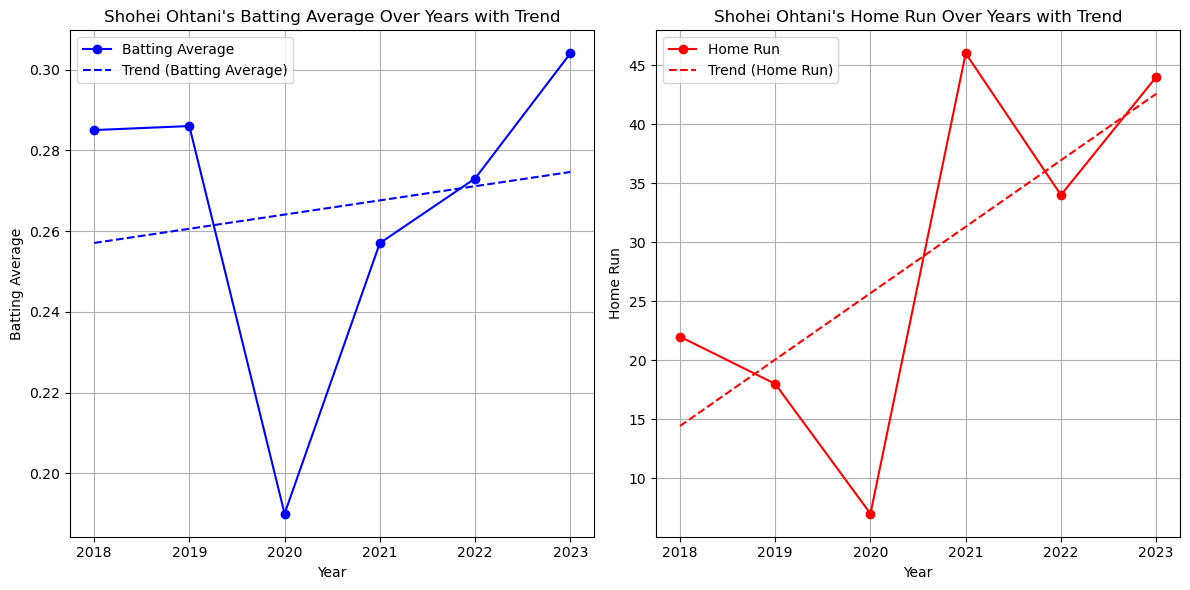

예측 결과 (2024년): 타율 - 0.278, 홈런 - 48.2


In [28]:
data = pd.read_csv("mlb2018_2023.csv")

otani_data = data[data["last_name, first_name"] == "Ohtani, Shohei"]

# 선형 회귀 모델 학습
X = otani_data["year"].values.reshape(-1, 1)
y_batting_avg = otani_data["batting_avg"].values.reshape(-1, 1)
y_home_run = otani_data["home_run"].values.reshape(-1, 1)

model_batting_avg = LinearRegression()
model_batting_avg.fit(X, y_batting_avg)

model_home_run = LinearRegression()
model_home_run.fit(X, y_home_run)
plt.figure(figsize=(12, 6))

# 타율
plt.subplot(1, 2, 1)
plt.plot(otani_data["year"], otani_data["batting_avg"], marker='o', linestyle='-', color='b', label='Batting Average')
plt.plot(X, model_batting_avg.predict(X), linestyle='--', color='b', label='Trend (Batting Average)')
plt.title("Shohei Ohtani's Batting Average Over Years with Trend")
plt.xlabel("Year")
plt.ylabel("Batting Average")
plt.legend()
plt.grid(True)
plt.xticks(otani_data["year"])

# 홈런
plt.subplot(1, 2, 2)
plt.plot(otani_data["year"], otani_data["home_run"], marker='o', linestyle='-', color='r', label='Home Run')
plt.plot(X, model_home_run.predict(X), linestyle='--', color='r', label='Trend (Home Run)')
plt.title("Shohei Ohtani's Home Run Over Years with Trend")
plt.xlabel("Year")
plt.ylabel("Home Run")
plt.legend()
plt.grid(True)
plt.xticks(otani_data["year"])

plt.tight_layout()
plt.savefig('Ohtani5.png', dpi = 400, bbox_inches = 'tight')
plt.show()

# 예측 출력
future_year = 2024
predicted_batting_avg = model_batting_avg.predict([[future_year]])[0][0]
predicted_home_run = model_home_run.predict([[future_year]])[0][0]
print(f"예측 결과 ({future_year}년): 타율 - {predicted_batting_avg:.3f}, 홈런 - {predicted_home_run:.1f}")
